In [29]:
import pandas as pd
#using TextBlob
from textblob import TextBlob
#using vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Using Positive and Negative Word Count
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
df=pd.read_csv('prepData.csv')

In [5]:
df.head()

,Unnamed: 0,id,Time,Tweet,tags,pre,words
0,0,1578527198734065664,2023-02-13 17:09:44+00:00,b'runny nose tear eyes fever headache loss of ...,fever,b runny nose tear eyes fever headache loss of ...,"['b', 'runny', 'nose', 'tear', 'eyes', 'fever'..."
1,1,49049956,2023-02-13 15:34:08+00:00,b'@katkinneywrites i have hot/cold sometimes. ...,fever,b i have hot cold sometimes usually cold means...,"['b', 'i', 'have', 'hot', 'cold', 'sometimes',..."
2,2,92341784,2023-02-13 13:57:31+00:00,b'cytomegalovirus colitis - complication when ...,fever,b cytomegalovirus colitis complication when cd...,"['b', 'cytomegalovirus', 'colitis', 'complicat..."
3,3,1179433528687239173,2023-02-13 11:38:54+00:00,b'@fatalkci l know otli and matli for nausea a...,fever,b l know otli and matli for nausea and vomitin...,"['b', 'l', 'know', 'otli', 'and', 'matli', 'fo..."
4,4,856681920,2023-02-13 01:57:45+00:00,b'went from a fever to a cough to a sore throa...,fever,b went from a fever to a cough to a sore throa...,"['b', 'went', 'from', 'a', 'fever', 'to', 'a',..."


## Text Blob

In [13]:
def sentiment_analysis(df):
    
    def getSubjectivity(text):
        
        return TextBlob(text).sentiment.subjectivity
    def getPolarity(text):
        
        return TextBlob(text).sentiment.polarity
    df['TextBlob_Subjectivity']=df['pre'].apply(getSubjectivity)
    df['TextBlob_Polarity']=df['pre'].apply(getPolarity)
    def getAnalysis(score):
        if score < 0:
            return 'Negative'
        elif score == 0:
            return 'Neutral'
        else:
            return 'Positive'
        df['TextBlob_Analysis'] = df['TextBlob_Polarity'].apply(getAnalysis )
    return df

In [14]:
sentiment_analysis(df)

,Unnamed: 0,id,Time,Tweet,tags,pre,words,TextBlob_Subjectivity,TextBlob_Polarity
0,0,1578527198734065664,2023-02-13 17:09:44+00:00,b'runny nose tear eyes fever headache loss of ...,fever,b runny nose tear eyes fever headache loss of ...,"['b', 'runny', 'nose', 'tear', 'eyes', 'fever'...",0.000,0.000000
1,1,49049956,2023-02-13 15:34:08+00:00,b'@katkinneywrites i have hot/cold sometimes. ...,fever,b i have hot cold sometimes usually cold means...,"['b', 'i', 'have', 'hot', 'cold', 'sometimes',...",0.950,-0.316667
2,2,92341784,2023-02-13 13:57:31+00:00,b'cytomegalovirus colitis - complication when ...,fever,b cytomegalovirus colitis complication when cd...,"['b', 'cytomegalovirus', 'colitis', 'complicat...",0.000,0.000000
3,3,1179433528687239173,2023-02-13 11:38:54+00:00,b'@fatalkci l know otli and matli for nausea a...,fever,b l know otli and matli for nausea and vomitin...,"['b', 'l', 'know', 'otli', 'and', 'matli', 'fo...",0.000,0.000000
4,4,856681920,2023-02-13 01:57:45+00:00,b'went from a fever to a cough to a sore throa...,fever,b went from a fever to a cough to a sore throa...,"['b', 'went', 'from', 'a', 'fever', 'to', 'a',...",0.000,0.000000
...,...,...,...,...,...,...,...,...,...
7475,7475,705162643,2023-02-05 11:45:11+00:00,b'#nowplaying jump (mega banton) by dengue fev...,dengue,b jump mega banton by dengue fever riddim onli...,"['b', 'jump', 'mega', 'banton', 'by', 'dengue'...",0.000,0.000000
7476,7476,63543042,2023-02-05 11:35:22+00:00,"b""rt @chris_c_chapman: blood counts still very...",dengue,b rt c chapman blood counts still very low but...,"['b', 'rt', 'c', 'chapman', 'blood', 'counts',...",0.390,0.000000
7477,7477,1273954059867701251,2023-02-05 11:30:20+00:00,b'rt @shukladeepak73: different activities by ...,dengue,b rt different activities by bccf under embed ...,"['b', 'rt', 'different', 'activities', 'by', '...",0.600,0.000000
7478,7478,3306545726,2023-02-05 11:26:45+00:00,"b'dengue: 1 more dies, 5 patients hospitalised...",dengue,b dengue 1 more dies 5 patients hospitalised n...,"['b', 'dengue', '1', 'more', 'dies', '5', 'pat...",0.500,0.500000


In [15]:
(df['TextBlob_Polarity']>0).sum()

2660

In [16]:
(df['TextBlob_Polarity']<0).sum()

1752

In [18]:
(df['TextBlob_Polarity']==0).sum()

3068

In [19]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [26]:
df.head()

,id,Time,Tweet,tags,pre,words,TextBlob_Subjectivity,TextBlob_Polarity
0,1578527198734065664,2023-02-13 17:09:44+00:00,b'runny nose tear eyes fever headache loss of ...,fever,b runny nose tear eyes fever headache loss of ...,"['b', 'runny', 'nose', 'tear', 'eyes', 'fever'...",0.00,0.000000
1,49049956,2023-02-13 15:34:08+00:00,b'@katkinneywrites i have hot/cold sometimes. ...,fever,b i have hot cold sometimes usually cold means...,"['b', 'i', 'have', 'hot', 'cold', 'sometimes',...",0.95,-0.316667
2,92341784,2023-02-13 13:57:31+00:00,b'cytomegalovirus colitis - complication when ...,fever,b cytomegalovirus colitis complication when cd...,"['b', 'cytomegalovirus', 'colitis', 'complicat...",0.00,0.000000
3,1179433528687239173,2023-02-13 11:38:54+00:00,b'@fatalkci l know otli and matli for nausea a...,fever,b l know otli and matli for nausea and vomitin...,"['b', 'l', 'know', 'otli', 'and', 'matli', 'fo...",0.00,0.000000
4,856681920,2023-02-13 01:57:45+00:00,b'went from a fever to a cough to a sore throa...,fever,b went from a fever to a cough to a sore throa...,"['b', 'went', 'from', 'a', 'fever', 'to', 'a',...",0.00,0.000000


## vader

In [34]:
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


In [48]:
type(fd)

nltk.probability.FreqDist

In [57]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
from nltk.corpus import stopwords
from collections import Counter
import re


In [59]:
stopwords = set(stopwords.words('english'))

In [60]:
def to_list(strg_list):
  return strg_list.strip("[]").replace("'","").replace('"',"").replace(",","").split() 

In [61]:
def remove_stopwords(strg_list):
  list_item=to_list(strg_list)
  return str([word for word in list_item if word not in stopwords])

In [62]:
df2=df[['words']].copy()

In [63]:
df2['token_nosw']=df['words'].apply(remove_stopwords)
print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7480 entries, 0 to 7479
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   words       7480 non-null   object
 1   token_nosw  7480 non-null   object
dtypes: object(2)
memory usage: 117.0+ KB
None


,words,token_nosw
0,"['b', 'runny', 'nose', 'tear', 'eyes', 'fever'...","['b', 'runny', 'nose', 'tear', 'eyes', 'fever'..."
1,"['b', 'i', 'have', 'hot', 'cold', 'sometimes',...","['b', 'hot', 'cold', 'sometimes', 'usually', '..."
2,"['b', 'cytomegalovirus', 'colitis', 'complicat...","['b', 'cytomegalovirus', 'colitis', 'complicat..."
3,"['b', 'l', 'know', 'otli', 'and', 'matli', 'fo...","['b', 'l', 'know', 'otli', 'matli', 'nausea', ..."
4,"['b', 'went', 'from', 'a', 'fever', 'to', 'a',...","['b', 'went', 'fever', 'cough', 'sore', 'throa..."


### create freq dist

In [65]:
strg_token=" ".join([" ".join(to_list(strg_list)) for strg_list in df2['token_nosw']])
print(strg_token)

b runny nose tear eyes fever headache loss appetite chills nausea nidk im functioning work b hot cold sometimes usually cold means things turning around like fever breaking b cytomegalovirus colitis complication cd4 lt 50 cells microl nausea fever abd pain diarrhea hemorrhag b l know otli matli nausea vomiting nsar darad headache nbukhar fever ntakleef b went fever cough sore throat flu perma sneezing nosebleeds nausea span 5 days pls send help b initial sick day covid absolutely brutal 8 days later fever nausea killing today weird fucking disease b rt disco fever disco nausea disco stomach cramps died disco dysentery b fever flu starting thursday tonight feeling nausea b may fever nausea everyone talking babies encrypted code b also vomiting nausea diarrhoea shaking peripheries dyspnea fever etc b well wish came true body aches fever nausea im miserable b catching cold tropical cold n ncause much exertion outdoor activities bad weather n nsymptoms nausea fever b fever nausea vomiting 

In [66]:
from nltk import FreqDist
fdist = FreqDist(strg_token.split())
fdist

FreqDist({'b': 7519, 'n': 1785, 'fever': 884, 'rt': 841, 'flu': 798, 'nausea': 792, 'anxiety': 760, 'sprain': 755, 'stroke': 741, 'asthma': 714, ...})

In [115]:
fdist30=fdist.most_common(30)

### 30 most common words

In [118]:
fdist30[13:]

[('ankle', 603),
 ('high', 478),
 ('like', 459),
 ('im', 311),
 ('get', 285),
 ('amp', 271),
 ('nthe', 264),
 ('people', 252),
 ('day', 236),
 ('one', 230),
 ('got', 211),
 ('2', 174),
 ('covid', 170),
 ('bird', 169),
 ('think', 167),
 ('time', 161),
 ('know', 160)]

In [70]:
fd_df=pd.DataFrame(fdist.items(), columns=['word', 'frequency'])

In [76]:
fd_df['frequency'].sort_values()

12890       1
7525        1
7526        1
7527        1
7528        1
         ... 
50        798
73        841
5         884
104      1785
0        7519
Name: frequency, Length: 12891, dtype: int64

In [74]:
fd_df

,word,frequency
0,b,7519
1,runny,2
2,nose,8
3,tear,7
4,eyes,19
...,...,...
12886,meerut,1
12887,brajeshpathakup,1
12888,dmmeerut,1
12889,consumer,1


In [97]:
fd_df=fd_df.sort_values(by='frequency',ascending=False)

In [114]:
len(fd_df['frequency'])

12891

In [113]:
(fd_df['frequency']>=100).sum()

76

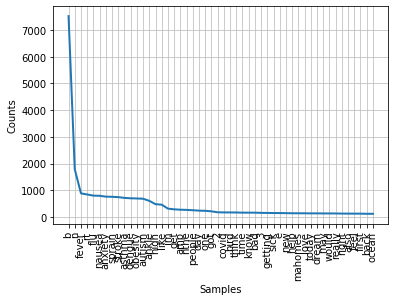

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [67]:
fdist.plot(50)

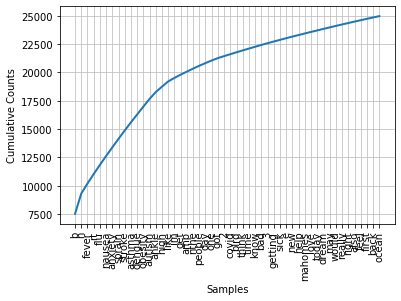

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [68]:
fdist.plot(50, cumulative=True)

## vader

In [120]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()


## Using Positive and Negative Word Count – With Normalization

In [20]:
df4=pd.read_csv('labelledData.csv')

In [21]:
df4['split_tweets'] = df4['Tweet'].str.split(' ')

In [22]:
df4['total_len'] = df4['split_tweets'].map(lambda x: len(x))

In [23]:
df4.head()

,Unnamed: 0,Tweet,Flag,Tags,split_tweets,total_len
0,3,"b'Coba cek ini, deh: ""SKINTIFIC Best Seller Re...",1,Skincare,"[b'Coba, cek, ini,, deh:, ""SKINTIFIC, Best, Se...",21
1,7,b'RT @EBBahboh: How to \xe0\xb8\xad\xe0\xb9\x8...,1,Skincare,"[b'RT, @EBBahboh:, How, to, \xe0\xb8\xad\xe0\x...",11
2,10,b'@returnofprince2 This is like saying diabete...,1,diabetes,"[b'@returnofprince2, This, is, like, saying, d...",11
3,14,"b""RT @Kpop_Herald: Cha Eun-woo of @offclASTRO ...",1,skincare,"[b""RT, @Kpop_Herald:, Cha, Eun-woo, of, @offcl...",22
4,15,b'RT @GoSatvik: What concerns me today is the ...,1,asthma,"[b'RT, @GoSatvik:, What, concerns, me, today, ...",21


In [80]:
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()

In [81]:
pos_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [27]:
num_pos = df4['split_tweets'].map(lambda x: len([i for i in x if i in pos_words]))
df4['pos_count'] = num_pos
num_neg = df4['split_tweets'].map(lambda x: len([i for i in x if i in neg_words]))
df4['neg_count'] = num_neg

In [28]:
df4.head()

,Unnamed: 0,Tweet,Flag,Tags,split_tweets,total_len,pos_count,neg_count
0,3,"b'Coba cek ini, deh: ""SKINTIFIC Best Seller Re...",1,Skincare,"[b'Coba, cek, ini,, deh:, ""SKINTIFIC, Best, Se...",21,0,0
1,7,b'RT @EBBahboh: How to \xe0\xb8\xad\xe0\xb9\x8...,1,Skincare,"[b'RT, @EBBahboh:, How, to, \xe0\xb8\xad\xe0\x...",11,0,0
2,10,b'@returnofprince2 This is like saying diabete...,1,diabetes,"[b'@returnofprince2, This, is, like, saying, d...",11,1,1
3,14,"b""RT @Kpop_Herald: Cha Eun-woo of @offclASTRO ...",1,skincare,"[b""RT, @Kpop_Herald:, Cha, Eun-woo, of, @offcl...",22,0,0
4,15,b'RT @GoSatvik: What concerns me today is the ...,1,asthma,"[b'RT, @GoSatvik:, What, concerns, me, today, ...",21,0,1


## using semi normalization